
## Application of Artificial Neural Networks to predict PM1 concentrations in New Delhi, India using meteorological data

#### Kanan Patel, PhD student
#### Mcketta Department of Chemical Engineering, Cockrell school of Engineering
##### [Twitter](https://twitter.com/pkanan03)  | [Website](https://sites.google.com/view/kanan-patel) | [GoogleScholar](https://scholar.google.com/citations?user=x0c5PZsAAAAJ&hl=en) | [LinkedIn](https://www.linkedin.com/in/kanan-patel-0303/)

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Jack Xiao, Graduate Student, The University of Texas at Austin
##### [Twitter](https://twitter.com/jackxiao6) | [LinkedIn](https://www.linkedin.com/in/yuchen-jack-xiao-b1b20876/)


### Executive Summary

Prediction of ambient PM1 concentrations (Particulate Matter of size < 1 micron) using deterministic models which include chemistry/physics is challenging because of the unavailability of parameters (e.g. rate constants). Machine learning as a predictive method has not been well explored in the field of atmospheric science. In this project, I demonstrate the applicability of Artificial Neural Networks in predicting PM1 concentrations using meteorological parameters in New Delhi, India.

### Import Packages

In [14]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
import seaborn as sns                     # for plotting
import warnings                           # supress warnings from seaborn pairplot
from sklearn.model_selection import train_test_split  # train / test DatFrame split
from tensorflow.keras.models import Sequential, load_model  #tensforflow for ANN
from tensorflow.keras.layers import Dense, Dropout, Activation
import tensorflow as tf
import tensorflow.keras as keras #keras for ANN
from tensorflow.python.keras import backend as k
from matplotlib.dates import DateFormatter #for formatting dates on X-axis
import matplotlib.dates as mdates #for formatting dates on X-axis

### Load Data

The following workflow applies the .csv file 'PGE383_Project_Kanan_Patel_data.csv', which consists of hourly PM1 concentration data obtained at the Delhi Aerosol supersite from Jan-2017 to Mar-2018. It also consists of the meteorological data observed during the same period.  The PM1 dataset is available at [the Texas data repository](http://www.hasthelargehadroncolliderdestroyedtheworldyet.com/) and the meteorological data were obtained from the open source datasets: [NASA MERRA2](http://www.hasthelargehadroncolliderdestroyedtheworldyet.com/) and [ERA5](https://www.ecmwf.int/en/forecasts/datasets/reanalysis-datasets/era5). You can use these datasets as you like since they are publicly available.

We will work with the following features:

Response feature:
* **PM1** - Concentration of Particulate Matter of size less than 1 micron, in $\mu g/ m^3 $

Predictor features:
* **Temperature (T)** - Ambient Temperature, in $^oC$
* **Relative Humidity(RH)** - Ambient Relative humidity, in $Percentage $
* **Wind Speed(WS)** - Net Wind Speed, in $m/s$
* **Wind Direction(WD)** - Wind direction, in $^oN$. 0 is N, 90 is E, 180 is S, 270 is W
* **Precipitation(Precip)** - Total precipitation (rain), in $m$
* **Solar radiation(SR)** - Net solar radiation, proportional to the extent of photochemical processing, in $ Joule/m^2$

* **Planetary boundary layer height(PBLH)** - indicating the extent of vertical mixing in the atmosphere, in $ m$
* **Hour of the day (HOD)** - 00:00 hours as 1 and 23:00 hours as 24 (and the rest in increment of 1)
* **Day of the week (DOY)** - Monday as 1 and Sunday as 7 (and the rest in increment of 1)
* **Month of the year (MOY)** - Jan as 1 and Dec as 12 (and the rest in increment of 1)

The last three variables (HOD, DOW, MOY) have been introduced to consider emissions that may be relevant to time of the day or day of the week or month of the year. For example: vehicular emissions are high during morning and evening traffic rush hours, are relatively low over the weekends. Sources such as biomass burning are enhanced during the winter months. 

In [39]:
os.chdir(r"C:\UT Austin\UT Austin Courses\Fall 2020\Subsurface Machine Learning\Project")  # set the working directory                                 
my_data = pd.read_csv("PGE383_Project_Kanan_Patel_data.csv")    # load the comma delimited data file
my_data.describe().transpose() #Summary statistics

,count,mean,std,min,25%,50%,75%,max
H,10926.0,1206.381617,1030.682740,6.161475e+01,6.692392e+01,1142.603454,2.032060e+03,5.030212e+03
RH,10808.0,58.702659,23.526523,8.600000e+00,3.902000e+01,60.065000,7.876000e+01,1.480800e+02
T,10926.0,25.167289,8.671022,3.911615e+00,1.835155e+01,26.080286,3.193756e+01,4.557992e+01
WD,10926.0,239.164295,97.686067,6.140670e-03,1.684910e+02,279.781480,3.104091e+02,3.599712e+02
WS,10926.0,2.822108,1.361748,4.545376e-02,1.907816e+00,2.707794,3.433911e+00,1.055063e+01
Precip,10963.0,0.065553,0.379416,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.131187e+01
SR,10963.0,644893.833474,862080.233325,-2.330000e-10,-2.330000e-10,19179.826580,1.329320e+06,2.930136e+06
PM1,6607.0,101.302767,87.908483,2.543453e+00,3.670892e+01,70.919340,1.401434e+02,5.257656e+02
HOD,10968.0,12.500000,6.922502,1.000000e+00,6.750000e+00,12.500000,1.825000e+01,2.400000e+01
DOW,10968.0,4.000000,2.005554,1.000000e+00,2.000000e+00,4.000000,6.000000e+00,7.000000e+00


#### Observations from the statistics summary table
* There are some nan values in PM1, from periods when the measurement instrument was not operational
* RH exceeds 100, needs to be truncated to 100
* Solar radiation is negative, needs to be truncated to 0

In [16]:
my_data = my_data.dropna()                                  # Drop Nans in PM1 
num = my_data._get_numeric_data()                           # get shallow copy of the numerical values from the DataFrame
num[num < 0] = 0                                            # truncate negative values to 0.0
num['RH'][num['RH']>100]=100                                #truncate max. RH to 100
my_data.describe().transpose()                              #Check Summary statistics

C:\Users\pkana\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,count,mean,std,min,25%,50%,75%,max
H,6470.0,1219.697719,1037.072638,61.664818,67.194069,1140.055603,2.073084e+03,5.030212e+03
RH,6470.0,59.960457,23.829795,8.600000,39.860000,62.350000,7.969500e+01,1.000000e+02
T,6470.0,25.738699,8.696550,4.608789,18.744173,27.234842,3.269248e+01,4.474865e+01
WD,6470.0,240.586236,94.144097,0.011253,174.410291,279.491703,3.095986e+02,3.599517e+02
WS,6470.0,2.843489,1.298563,0.045454,1.957880,2.761250,3.453547e+00,8.660176e+00
Precip,6470.0,0.082331,0.371462,0.000000,0.000000,0.000000,5.178400e-04,6.816501e+00
SR,6470.0,658091.624964,871533.699825,0.000000,0.000000,34140.091305,1.357706e+06,2.900351e+06
PM1,6470.0,101.883993,88.163085,2.543453,36.812118,71.666506,1.417228e+02,5.257656e+02
HOD,6470.0,12.557032,6.934141,1.000000,7.000000,13.000000,1.900000e+01,2.400000e+01
DOW,6470.0,3.960433,1.968600,1.000000,2.000000,4.000000,6.000000e+00,7.000000e+00


### Basic data visualization
* sns pair plots help us understand how the variables are correlated to each other

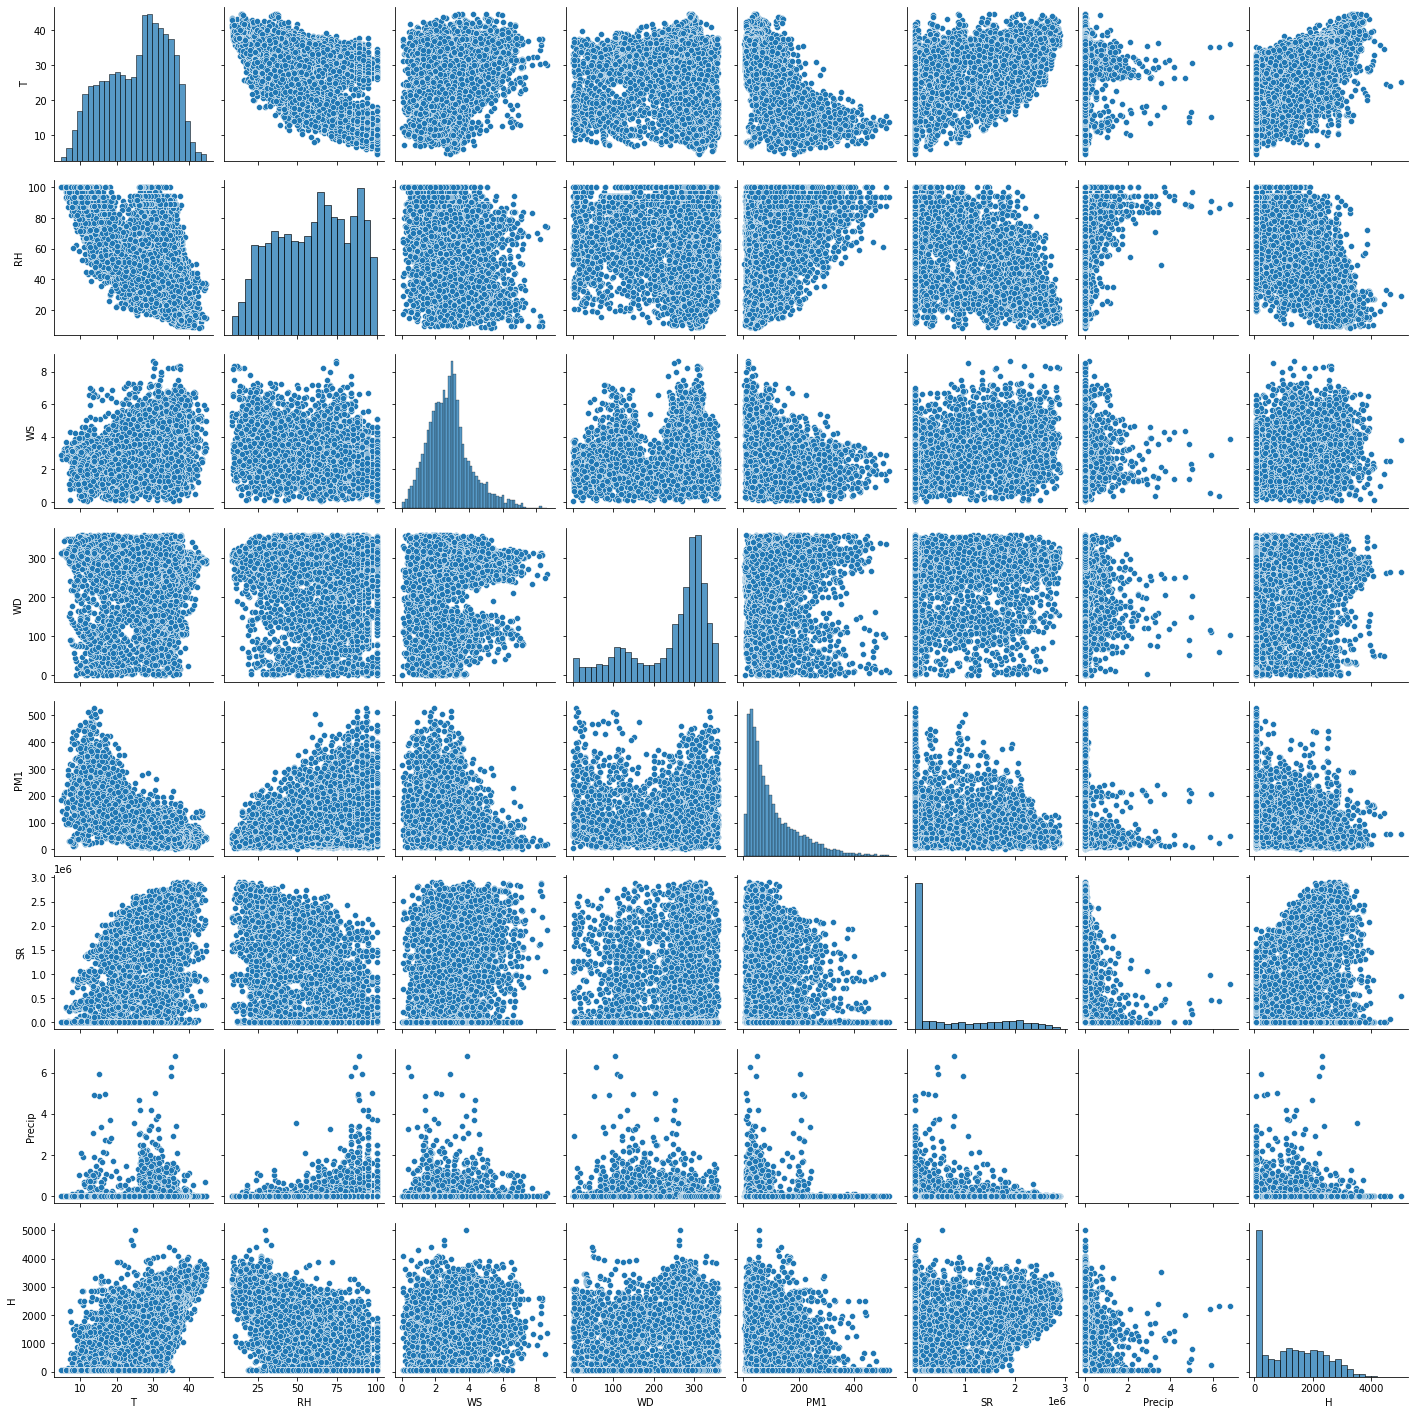

In [17]:
sns.pairplot(my_data,vars=['T','RH','WS','WD','PM1','SR','Precip','H'],markers='o') 

#### Observations from univariate distributions
* Most common H is <500, likely corresponding to constant low value observed during nighttime
* Most common Wind direction is from north west (between 300-360)
* Most common solar radiation is <0.5*10^6 , higher values likely correspond to clear clouds + summer (Apr-June) days
* Most common precipitation values are <1, higher values correspond to more rainy days, likely during monsoon season (Jul-Sep)

#### Observations from bivariate distributions
* Temperature (T) and planetary boundary layer height (H) are correlated
* Temperature (T) and relative humidity (RH) are anti-correlated
* High precipitation is associated with high RH – makes sense since rainy days are humid
* High PM1 concentrations are associated with low T and high RH – makes sense because low temperature causes partitioning to particle phase
* High PM1 concentrations are associated with low windspeed (WS) which makes sense because lower windspeed causes stagnation

Overall, the dependence of PM on the meteorological parameters is extremely non-linear and complicated. Artificial Neural Network is chosen as the preferred model since one of its main advantages is that it can predict well with complicated features. 

### Normalization
We will normalize the data so that their values are from -1 to 1

* This helps remove the impact of different ranges in the predictor variables
* This also helps improve activation function (used for non-linear transformation at the nodes) sensitivity (activation functions are designed to be sensitive to values of nodes closer to 0)

In [18]:
#Normalization by hand
H_min = my_data['H'].values.min(); H_max = my_data['H'].values.max()
RH_min = my_data['RH'].values.min(); RH_max = my_data['RH'].values.max()
T_min = my_data['T'].values.min(); T_max = my_data['T'].values.max()
WD_min = my_data['WD'].values.min(); WD_max = my_data['WD'].values.max()
WS_min = my_data['WS'].values.min(); WS_max = my_data['WS'].values.max()
Precip_min = my_data['Precip'].values.min(); Precip_max = my_data['Precip'].values.max()
SR_min = my_data['SR'].values.min(); SR_max = my_data['SR'].values.max()
PM1_min = my_data['PM1'].values.min(); PM1_max = my_data['PM1'].values.max()
HOD_min = my_data['HOD'].values.min(); HOD_max = my_data['HOD'].values.max()
DOW_min = my_data['DOW'].values.min(); DOW_max = my_data['DOW'].values.max()
MOY_min = my_data['MOY'].values.min(); MOY_max = my_data['MOY'].values.max()
my_data['H_N'] = (my_data['H'] - H_min)/(H_max - H_min) * 2 - 1
my_data['RH_N'] = (my_data['RH'] - RH_min)/(RH_max - RH_min) * 2 - 1
my_data['T_N'] = (my_data['T'] - T_min)/(T_max - T_min) * 2 - 1
my_data['WD_N'] = (my_data['WD'] - WD_min)/(WD_max - WD_min) * 2 - 1
my_data['WS_N'] = (my_data['WS'] - WS_min)/(WS_max - WS_min) * 2 - 1
my_data['Precip_N'] = (my_data['Precip'] - Precip_min)/(Precip_max - Precip_min) * 2 - 1
my_data['SR_N'] = (my_data['SR'] - SR_min)/(SR_max - SR_min) * 2 - 1
my_data['PM1_N'] = (my_data['PM1'] - PM1_min)/(PM1_max - PM1_min) * 2 - 1
my_data['HOD_N'] = (my_data['HOD'] - HOD_min)/(HOD_max - HOD_min) * 2 - 1
my_data['DOW_N'] = (my_data['DOW'] - DOW_min)/(DOW_max - DOW_min) * 2 - 1
my_data['MOY_N'] = (my_data['MOY'] - MOY_min)/(MOY_max - MOY_min) * 2 - 1

my_data.describe().transpose() # check if min and max values are between -1 and 1

,count,mean,std,min,25%,50%,75%,max
H,6470.0,1219.697719,1037.072638,61.664818,67.194069,1140.055603,2.073084e+03,5.030212e+03
RH,6470.0,59.960457,23.829795,8.600000,39.860000,62.350000,7.969500e+01,1.000000e+02
T,6470.0,25.738699,8.696550,4.608789,18.744173,27.234842,3.269248e+01,4.474865e+01
WD,6470.0,240.586236,94.144097,0.011253,174.410291,279.491703,3.095986e+02,3.599517e+02
WS,6470.0,2.843489,1.298563,0.045454,1.957880,2.761250,3.453547e+00,8.660176e+00
Precip,6470.0,0.082331,0.371462,0.000000,0.000000,0.000000,5.178400e-04,6.816501e+00
SR,6470.0,658091.624964,871533.699825,0.000000,0.000000,34140.091305,1.357706e+06,2.900351e+06
PM1,6470.0,101.883993,88.163085,2.543453,36.812118,71.666506,1.417228e+02,5.257656e+02
HOD,6470.0,12.557032,6.934141,1.000000,7.000000,13.000000,1.900000e+01,2.400000e+01
DOW,6470.0,3.960433,1.968600,1.000000,2.000000,4.000000,6.000000e+00,7.000000e+00


### Train/Test split

Split the data into train and test (we will use random selection)
* We will train the model (obtain model parameters) using training data
* We will test the model and tune the hyperparameters using testing data

In [19]:
X2 = my_data.drop(['PM1','PM1_N'], axis=1)  # extract the response feature - PM1
y2 = my_data.iloc[:,[7,19]]              # extract the predictor features - H,RH,T,WD,WS,Precip,SR,HOD,DOW,MOY
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=73073) #randonly choose 20% data as test data
Time_Train =X2_train['Time'] ; Time_test = X2_test['Time']
X2_train = X2_train.drop(['Time'], axis =1) #Drop Time column from the training data
X2_test = X2_test.drop(['Time'], axis=1)    #Drop Time column from the testing data

### ANN model 

* Here we build the model using artificial neural networks (ANN) 
* The model was evaluated with different combinations of learning rates, ANN architecture, activation functions, number of epochs
* Adam optimizer was used since it is usually computationally efficient (more on it in Kingma and Ba, 2015)
* A 10 (size of input layer) x 200 (size of hidden layer) x 1 (size of output layer) architecture was found to work best for the data set
* Batch size was set as 10 and number of epochs was set as 4000
* More details on the model runs are presented under "hyperparameter tuning " 

In [20]:
# Design the neural network (code used from Dr. Michael Pycrz's workflow on ANN: https://github.com/GeostatsGuy/PythonNumericalDemos)
model_2 = Sequential([
    Dense(10, activation='linear'),                  # input layer
    Dense(200, activation=tf.keras.layers.LeakyReLU(alpha=0.3)), #Can change activation function
    #Dense(200, activation=tf.keras.layers.LeakyReLU(alpha=0.3)),
   # Dense(500, activation='leakyrelu'), 
    #Dense(500, activation='relu'),                                    # uncomment these to add hidden layers
#    Dense(100, activation='relu'),
#    Dense(100, activation='relu'),
#    Dense(100, activation='relu'),
    Dense(1, activation='linear'),                                     # output layer
])

# Select the Optimizer
adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False) # adam optimizer
#sgd = keras.optimizers.SGD(lr=0.001, momentum=0.0, decay = 0.0, nesterov=False)  # stochastic gradient descent

# Compile the Machine
model_2.compile(optimizer=adam,loss='mse',metrics=['accuracy'])

# Train the Network
hist_2 = model_2.fit(X2_train.iloc[:,10:20].values, y2_train.iloc[:,1].to_numpy(), #use normalized variables for training and validation
    batch_size=10, epochs=4000,                             #Using batch size = 10 and epochs = 4000
    validation_data=(X2_test.iloc[:,10:20].values, y2_test.iloc[:,1]),verbose = 0)


#### Comments on Hyperparameter tuning

Manual search was performed to obtain the set of hyperparameters that improved model performance in testing:

I tried the following runs but failed to achieve a good solution
* learning rate = 0.001, 9x25x1 (relu activation in hidden layers)-  got stuck in a local minimum
* learning rate = 0.0001, 9x25x1 (relu activation in hidden layer) - got high loss function values, did not converge in 1000 epochs
* learning rate = 0.0001, 9x100x1 (relu activation in hidden layer) - got high loss function values, did not converge in 1000 epochs
* learning rate = 0.0001,  9x75x1 (relu activation in hidden layer), converged in 2000 epochs in training but not in testing

Leaky relu activation function may help overcome the limitation with relu which may fail when input values are mostly negative. 

Relu (Rectified linear unit) is defined as: 
$max(0,x)$  

Leaky Relu is defined as:  
f(x) = $alpha * x$ if x < 0  
(x) = $x$ if $x >= 0 $

The following runs were tried with leaky relu in the hidden layer
  
* learning rate = 0.0001,  9x75x1, converged in 3000 epochs, but missing some features.
* learning rate = 0.0001, 9x100x1, converged in 4000 epochs, testing data can do better.
* learning rate = 0.0001, 9x200x1, converged in 4000 epochs, testing data perform well - chosen for the model!

### Model evaluation
Here we use L2 norm of the residuals (residual = Predicted PM - observed PM) as 'loss' to estimate the inaccuracy of the model

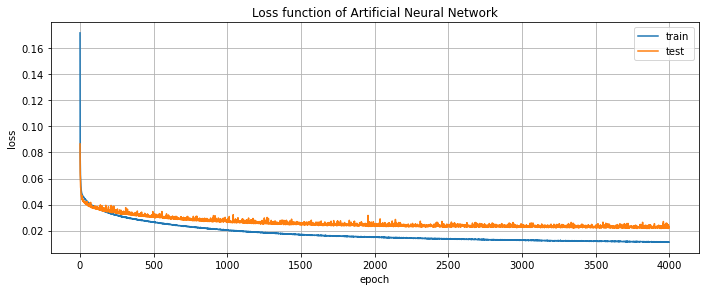

Testing loss value (model inaccuracy) after 4000 epochs: 0.023


In [40]:
# Plot the Loss vs. Epoch
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Loss function of Artificial Neural Network')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.8, wspace=0.2, hspace=0.2)
plt.show()
#Print out loss value obtained in testing
print('Testing loss value (model inaccuracy) after 4000 epochs: %.3f' % hist_2.history['val_loss'][3999])

#### Comments
* Loss values in training are stable after ~ 3500 epochs
* Loss values in testing are stable after ~2000 epochs

### Model Visualization
* Here we visualize the predicted PM1 vs observed PM1 for testing and training data
* We also visualise the testing data PM time series

C:\Users\pkana\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.
C:\Users\pkana\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


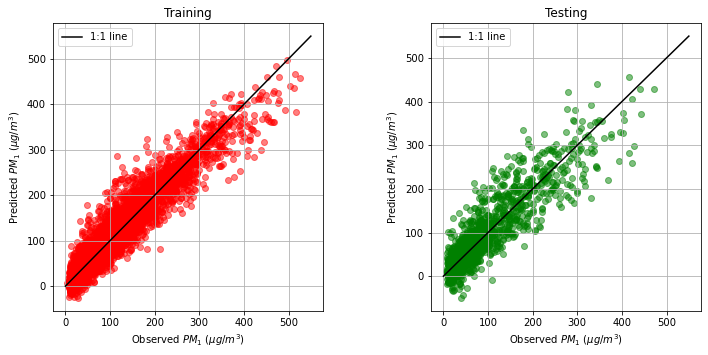

C:\Users\pkana\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\pkana\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


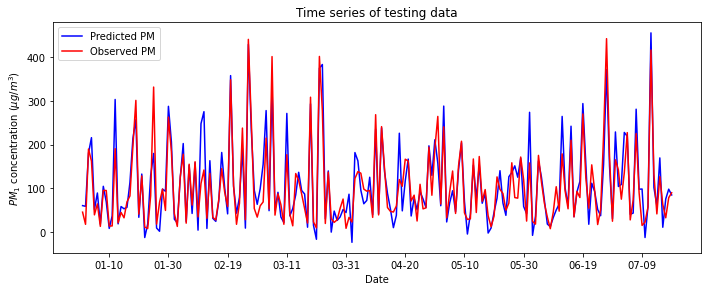

In [38]:
#Plot the response variable predicted and observed
pred_norm_PM_train = model_2.predict(X2_train.iloc[:,10:20].values)       #Predit PM1 for training data
pred_PM_train= ((pred_norm_PM_train + 1)/2*(PM1_max - PM1_min)+PM1_min)   #Back transform to actual values
pred_norm_PM_test = model_2.predict(X2_test.iloc[:,10:20].values)         #Predict PM1 for testing data
pred_PM_test= ((pred_norm_PM_test + 1)/2*(PM1_max - PM1_min)+PM1_min)     #Back transform to actual values
X_1 = [0,550]; Y_1 = [0,550] # 1:1 line data
plt.subplots()
plt.subplot(121)
plt.scatter(y2_train.iloc[:,0],pred_PM_train, color='red', alpha = 0.5)   #Plot observed and predicted PM (Training)
plt.plot(X_1,Y_1, color = 'black', Label = '1:1 line')
plt.ylabel('Predicted $PM_1$ $(\mu g/m^{3})$')
plt.xlabel('Observed $PM_1$ $(\mu g/m^{3})$')
plt.title('Training')
plt.legend()
plt.grid()
plt.subplot(122)
plt.scatter(y2_test.iloc[:,0],pred_PM_test, color='green', alpha = 0.5)  #Plot observed and predicted PM (Testing)
plt.plot(X_1,Y_1, color = 'black', Label = '1:1 line')
plt.ylabel('Predicted $PM_1$ $(\mu g/m^{3})$')
plt.xlabel('Observed $PM_1$ $(\mu g/m^{3})$')
plt.title('Testing')
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1, wspace=0.4, hspace=0.5)
plt.grid()
plt.show()
plt.subplot(111)
#Plot the time series of the test data
plt.plot(Time_test.iloc[:200], pred_PM_test[:200], color = 'blue', Label = "Predicted PM")
plt.plot(Time_test.iloc[:200], y2_test.iloc[0:200,0],color ='red', markeredgecolor='black', alpha=1.0, Label ="Observed PM")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) 
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20)) 
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.8, wspace=0.2, hspace=0.2)
plt.xlabel('Date')
plt.ylabel('$PM_1$ concentration $(\mu g/m^{3})$')
plt.legend()
plt.title('Time series of testing data')
plt.show()

### Final comments

Thus, we are able build a machine learning model that predicts PM from meteorological data! This model can be useful to predict pollution episodes so that the public can be better prepared (e.g. stay indoors, wear masks).

I hope this was useful! I am a fourth year PhD student in Chemical Engineering with a research focus on air quality and atmospheric chemistry. I am actively looking for opportunities to combine my skills in air quality and data science. 


#### Kanan Patel, PhD student
email: kananpatel@utexas.edu
#### Mcketta Department of Chemical Engineering, Cockrell school of Engineering
##### [Twitter](https://twitter.com/pkanan03)  | [Website](https://sites.google.com/view/kanan-patel) | [GoogleScholar](https://scholar.google.com/citations?user=x0c5PZsAAAAJ&hl=en) | [LinkedIn](https://www.linkedin.com/in/kanan-patel-0303/)
